## Problem: 1

Profile Table of "SP500_close_price_no_missing.csv" dataset.

In [1]:
import pandas as pd
import numpy as np

# Specify data types for problematic columns (replace 'your_dataset.csv' and column names as needed)
column_data_types = {
    'ColumnName1': str,  # Replace 'ColumnName1' with the actual column name
    'ColumnName2': str,  # Replace 'ColumnName2' with the actual column name
    # Add more columns as needed
}

# Load your dataset into a Pandas DataFrame with specified data types and low_memory=False
df = pd.read_csv('./SP500_close_price_no_missing.csv', dtype=column_data_types, low_memory=False)

# Get the total number of rows and columns
num_rows, num_cols = df.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_cols}")
print("")
print("Profile Table:")

# Initialize an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column_name in df.columns:
    column_data = df[column_name]
    
    # Determine the data type
    data_type = str(column_data.dtype)
    
    # Calculate statistics based on data type
    if np.issubdtype(column_data, np.number):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_dev = column_data.std()
        unique_values = len(column_data.unique())  # Numeric columns don't have unique values
        top_3_values = column_data.value_counts().head(3).to_dict()  # Numeric columns don't have top values
    else:
        min_val = None  # Non-numeric columns don't have min values
        max_val = None  # Non-numeric columns don't have max values
        mean_val = None  # Non-numeric columns don't have mean values
        median_val = None  # Non-numeric columns don't have median values
        std_dev = None  # Non-numeric columns don't have standard deviation
        unique_values = len(column_data.unique())
        top_3_values = column_data.value_counts().head(3).to_dict()
    
    # Calculate missingness
    missingness_percentage = (column_data.isnull().sum() / num_rows) * 100
    
    # Add information to the profile data list
    profile_data.append([column_name, data_type, min_val, max_val, mean_val, median_val, std_dev, unique_values, top_3_values, missingness_percentage])

# Create a DataFrame from the profile data
profile_table = pd.DataFrame(profile_data, columns=['Column Name', 'Data Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

# Display the profile table
print(profile_table)


Total number of call instances/rows: 1043
Total number of call features/columns: 472

Profile Table:
    Column Name Data Type    Min     Max        Mean  Median    Std Dev  \
0          date    object    NaN     NaN         NaN     NaN        NaN   
1           MMM   float64  70.93  167.27  108.075321   96.67  24.059535   
2           ACE   float64  58.98  117.58   83.658408   81.32  15.568569   
3           ABT   float64  32.05   72.13   47.626587   45.70  10.753231   
4           ANF   float64  26.35   77.14   45.870297   45.26  12.149391   
..          ...       ...    ...     ...         ...     ...        ...   
467          XL   float64  18.17   36.30   26.650470   25.46   5.128537   
468        YHOO   float64  11.09   52.37   24.711707   19.62  10.644493   
469         YUM   float64  46.40   83.29   66.045983   68.16   8.716185   
470         ZMH   float64  47.41  115.05   75.650173   69.02  17.895802   
471        ZION   float64  13.68   32.99   24.139012   24.12   4.740165   

    a. Fitting a PCA model to log returns (log return = log( Price [t+1]/Price [t]) derived from stock price data.

In [2]:
from sklearn.decomposition import PCA

# Extract relevant columns (assuming the stock price columns start from index 1)
stock_prices = df.iloc[:, 1:]

# Calculate log returns
log_returns = np.log(stock_prices / stock_prices.shift(1))

# Drop the first row (NaN due to the shift operation)
log_returns = log_returns.dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the results or use them for further analysis
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components:
[[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 ... -3.75518775e-05
  -5.22776023e-04 -8.49448862e-04]
 [-4.99408860e-04 -9.12100058e-04 -7.56590694e-05 ... -1.03866157e-03
   1.81834660e-04 -6.28529911e-04]
 [-1.78474224e-03 -1.81058788e-03 -1.44179741e-03 ... -2.51673814e-03
  -1.84851626e-03 -2.76233286e-03]
 ...
 [-2.42704670e-02  2.39167801e-02  3.69181057e-04 ... -1.40528826e-02
   5.33839190e-02  3.77620259e-03]
 [ 1.10526172e-01 -1.41232839e-01  1.28572987e-03 ...  1.32678149e-02
   3.08857741e-02 -2.55848522e-02]
 [-5.40650043e-02  1.66989206e-01 -1.07477005e-03 ...  1.65081118e-02
  -5.03765682e-03 -1.39235772e-02]]

Explained Variance Ratio:
[6.61885734e-01 1.42368701e-01 7.67741787e-02 3.50273951e-02
 3.17118985e-03 3.07349250e-03 2.58765820e-03 2.56111468e-03
 2.40367750e-03 1.96669755e-03 1.73378321e-03 1.59021335e-03
 1.53904438e-03 1.38807343e-03 1.36968694e-03 1.27251772e-03
 1.22635811e-03 1.15666157e-03 1.10633381e-03 1.03519139e-03
 9.8361766

    a.1. Deriving log returns from the raw stock price dataset.

In [3]:
# Extract relevant columns (assuming the stock price columns start from index 1)
stock_prices = df.iloc[:, 1:]

# Calculate log returns
log_returns = np.log(stock_prices / stock_prices.shift(1))

# Add the 'date' column back to the log returns DataFrame
log_returns['date'] = df['date']

# Drop the first row (NaN due to the shift operation)
log_returns = log_returns.dropna()

# Print or use the log returns DataFrame for further analysis
print("Log Returns:")
print(log_returns)


Log Returns:
           MMM       ACE       ABT       ANF      ADBE       AMD       AES  \
1    -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806  0.004773   
2     0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837  0.013402   
3    -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001  0.017081   
4     0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982  0.000000   
5     0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961 -0.001541   
...        ...       ...       ...       ...       ...       ...       ...   
1038  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1039 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000  0.029256   
1040  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766  0.010493   
1041 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342 -0.024658   
1042 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095 -0.017993   

           AET       AFL         A  ...      WYNN 

    a.2. Plotting a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

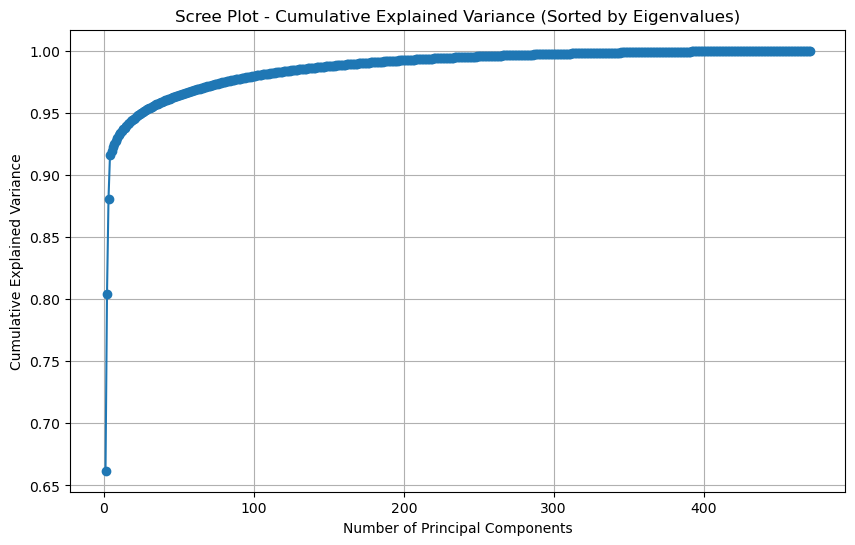

In [4]:
import matplotlib.pyplot as plt

# Sort eigenvalues and components
sorted_explained_variance = pca.explained_variance_
sorted_components = pca.components_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_explained_variance) / np.sum(sorted_explained_variance)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot - Cumulative Explained Variance (Sorted by Eigenvalues)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

    a.3. Creating a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction.

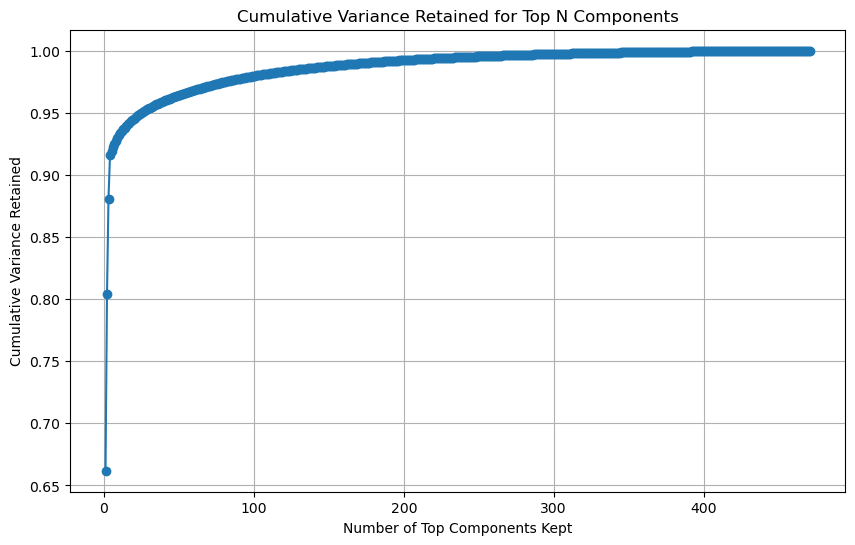

In [5]:
# Create a second plot for cumulative variance retained for top N components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Variance Retained for Top N Components')
plt.xlabel('Number of Top Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.grid(True)
plt.show()

    a.4. Number of principal components must be retained to capture at least 80% of the variance in data.

In [6]:
# Assuming you've already performed PCA and have 'explained_variance_ratio'
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Find the number of components needed to capture at least 80% of the variance
desired_variance = 0.8
num_components_80_percent = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of principal components must be retained to capture at least 80% of the variance in data: {num_components_80_percent}")

Number of principal components must be retained to capture at least 80% of the variance in data: 2


    b. Analysis of principal components and weights

    b.1. Computing and plotting the time series of the 1st principal component and identifying the date with the lowest value for this component.

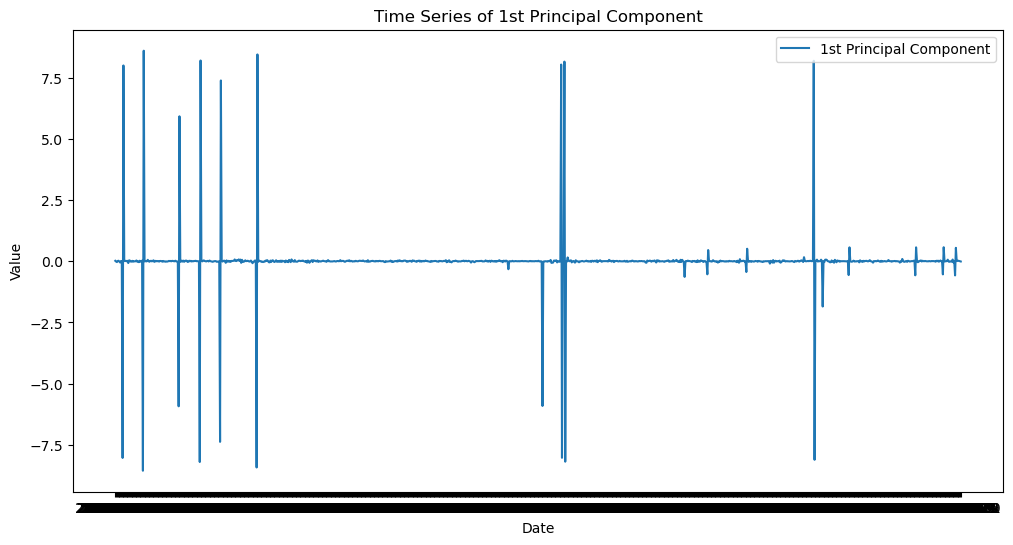

Date with the lowest value for the 1st principal component: 2011-02-21
Lowest value for the 1st principal component: -8.556903587211288


In [7]:
import matplotlib.pyplot as plt

# Extract the 1st principal component
first_principal_component = pca.components_[0]

# Extract only the numeric columns for matrix multiplication
numeric_columns = log_returns.select_dtypes(include=[np.number]).columns
log_returns_matrix = log_returns[numeric_columns].values.astype(float)

# Calculate the time series of the 1st principal component for each date
time_series_1st_component = np.dot(log_returns_matrix, first_principal_component)

# Add the 'date' column back to the time series
time_series_df = pd.DataFrame({'date': log_returns['date'], '1st_principal_component': time_series_1st_component})

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['date'], time_series_df['1st_principal_component'], label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Find the date with the lowest value for the 1st principal component
min_date_index = time_series_df['1st_principal_component'].idxmin()
min_value = time_series_df.loc[min_date_index, '1st_principal_component']
min_date = time_series_df.loc[min_date_index, 'date']

print(f"Date with the lowest value for the 1st principal component: {min_date}")
print(f"Lowest value for the 1st principal component: {min_value}")

    b.2. Extracting the weights from the PCA model for 1st and 2nd principal components.

In [8]:
# Extract weights for the 1st and 2nd principal components
first_component_weights = pca.components_[0]
second_component_weights = pca.components_[1]

# Print or use the weights as needed
print("Weights for the 1st principal component:")
print(first_component_weights)

print("\nWeights for the 2nd principal component:")
print(second_component_weights)


Weights for the 1st principal component:
[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 -2.84996292e-04
 -5.72619142e-04  4.83386817e-05 -3.91390757e-04 -4.58434408e-04
 -6.23355389e-04 -9.66790406e-04 -1.90161299e-04 -1.46205151e-04
 -1.15296428e-03 -1.72594136e-04 -4.68930601e-04 -6.97485914e-04
  8.32226145e-04 -2.84771634e-04 -3.45667066e-04  2.36078671e-04
  5.68257965e-06 -6.03865332e-04  1.88067208e-04 -3.60323058e-04
 -8.37719988e-04 -1.43300062e-04 -5.86539013e-04  7.48145146e-05
  4.97410488e-04 -9.91840678e-05 -2.94322931e-04 -6.50148287e-05
 -1.48893275e-04 -7.82702002e-04  3.27133183e-04  1.33951228e-03
  3.81881715e-04 -5.37882867e-04 -1.64863697e-04 -1.07117661e-03
  5.46174428e-05  1.24382506e-04 -1.18797408e-04 -2.47941669e-04
 -2.03052052e-04  2.29708495e-04 -9.27833882e-05 -1.63851552e-03
 -5.88828380e-04 -1.88967778e-04 -7.00902935e-04 -6.55419524e-04
  6.85705246e-05 -1.94994383e-04 -3.93590788e-04 -7.42994119e-05
 -4.63434178e-04 -1.60462091e-04 -2.80157170e-04 

Profile Table of "SP500_ticker.csv" dataset.

In [9]:
# Specify the encoding when reading the CSV file
df2 = pd.read_csv('./SP500_ticker.csv', encoding='latin1', low_memory=False)

# Get the total number of rows and columns
num_rows, num_cols = df2.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_cols}")
print("")
print("Profile Table:")

# Initialize an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column_name in df2.columns:
    column_data = df2[column_name]
    
    # Determine the data type
    data_type = str(column_data.dtype)
    
    # Calculate statistics based on data type
    if np.issubdtype(column_data, np.number):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_dev = column_data.std()
        unique_values = len(column_data.unique())  # Numeric columns don't have unique values
        top_3_values = column_data.value_counts().head(3).to_dict()  # Numeric columns don't have top values
    else:
        min_val = None  # Non-numeric columns don't have min values
        max_val = None  # Non-numeric columns don't have max values
        mean_val = None  # Non-numeric columns don't have mean values
        median_val = None  # Non-numeric columns don't have median values
        std_dev = None  # Non-numeric columns don't have standard deviation
        unique_values = len(column_data.unique())
        top_3_values = column_data.value_counts().head(3).to_dict()
    
    # Calculate missingness
    missingness_percentage = (column_data.isnull().sum() / num_rows) * 100
    
    # Add information to the profile data list
    profile_data.append([column_name, data_type, min_val, max_val, mean_val, median_val, std_dev, unique_values, top_3_values, missingness_percentage])

# Create a DataFrame from the profile data
profile_table = pd.DataFrame(profile_data, columns=['Column Name', 'Data Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

# Display the profile table
print(profile_table)

Total number of call instances/rows: 500
Total number of call features/columns: 3

Profile Table:
    Column Name Data Type   Min   Max  Mean Median Std Dev  Unique Values  \
0        ticker    object  None  None  None   None    None            500   
1  company_name    object  None  None  None   None    None            500   
2        sector    object  None  None  None   None    None             21   

                                        Top 3 Values  Missingness (%)  
0                   {'MMM': 1, 'NTRS': 1, 'ORCL': 1}              0.0  
1  {'3M Co. ': 1, 'Northern Trust Corp. ': 1, 'Or...              0.0  
2  {'Financials ': 82, 'Consumer Discretionary ':...              0.0  


    b.3. Creating a plot to show weights of the 1st principal component grouped by the industry sector.

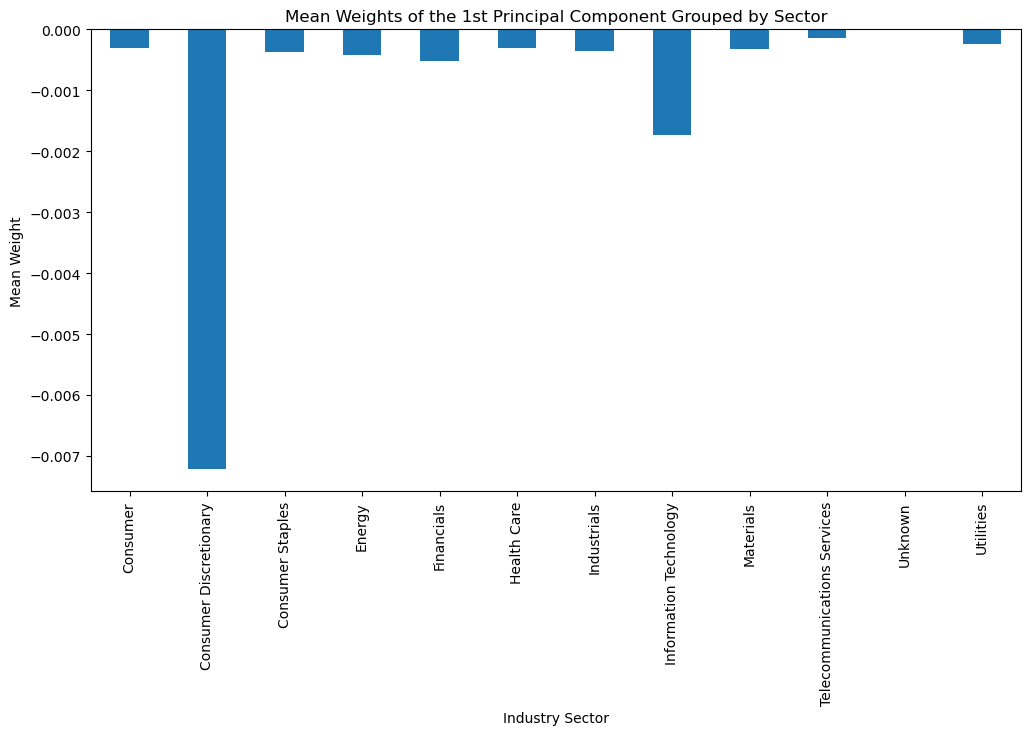

In [10]:
weights_1st_pc = pca.components_[0]
weights_2nd_pc = pca.components_[1]

mean_weight = np.mean(weights_1st_pc)
new_weights = np.full(29, mean_weight)
weights_1st_pc = np.concatenate((weights_1st_pc, new_weights))
df2['sector'] = df2['sector'].apply(lambda x: x.strip())
mean_weights_by_sector_1st_pc = df2.groupby('sector')['ticker'].apply(lambda x: np.mean([weights_1st_pc[np.where(df2['ticker'] == ticker)[0][0]] for ticker in x]))
#For each sector, above lambda function calculates the mean weight of the 1st principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_1st_pc.plot(kind='bar')
plt.title('Mean Weights of the 1st Principal Component Grouped by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

    b.4. Creating a plot to show weights of the 2nd principal component grouped by the industry sector.

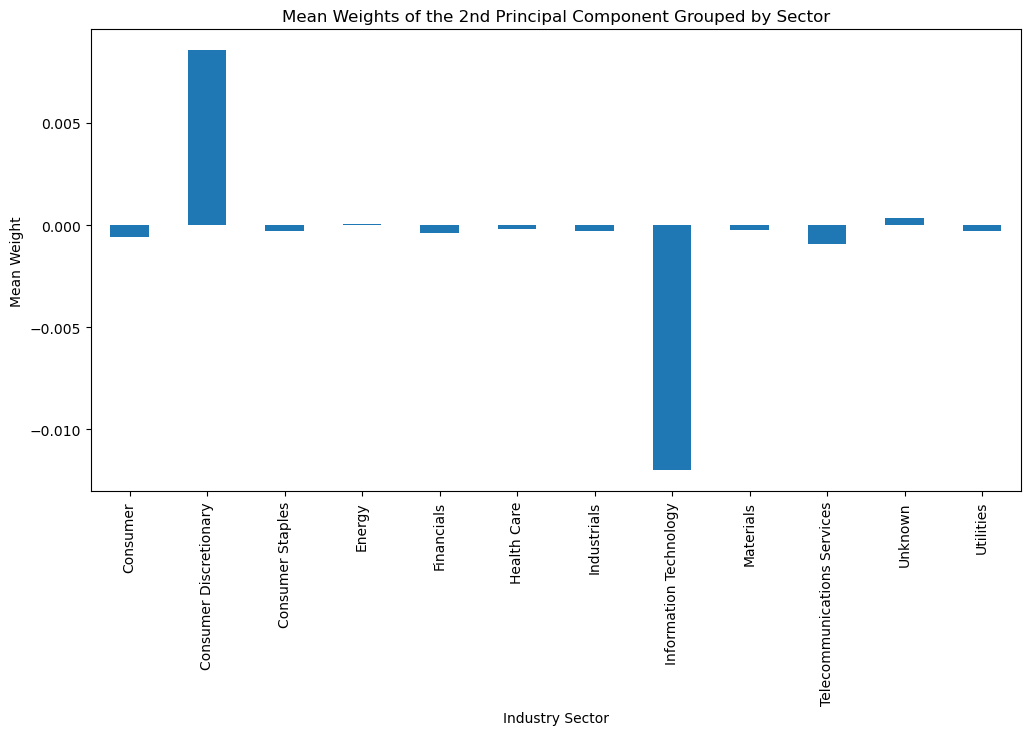

In [11]:
mean_weight_2 = np.mean(weights_2nd_pc)
new_weights = np.full(29, mean_weight_2)
weights_2nd_pc = np.concatenate((weights_2nd_pc, new_weights))
mean_weights_by_sector_2nd_pc = df2.groupby('sector')['ticker'].apply(lambda x: np.mean([weights_2nd_pc[np.where(df2['ticker'] == ticker)[0][0]] for ticker in x]))
#For each sector, above lambda function calculates the mean weight of the 1st principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd_pc.plot(kind='bar')
plt.title('Mean Weights of the 2nd Principal Component Grouped by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

    b.5. Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies. Which of the two components would you prefer to use for this purpose, the 1st or the 2nd? Why?

In [12]:
# Calculate explained variance for the 1st and 2nd principal components
explained_variance_pc1 = pca.explained_variance_ratio_[0]
explained_variance_pc2 = pca.explained_variance_ratio_[1]

print(f'Explained Variance - 1st Principal Component: {explained_variance_pc1:.2%}')
print(f'Explained Variance - 2nd Principal Component: {explained_variance_pc2:.2%}')

Explained Variance - 1st Principal Component: 66.19%
Explained Variance - 2nd Principal Component: 14.24%


- Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies then I would prefer to use the 1st principal component. The 1st principal component explains a much larger portion of the total variance compared to the 2nd principal component. The higher explained variance in the 1st component indicates that it captures a more significant amount of the variability present in the actual data. If I would construct an index based on the 1st principal component then it would allow me to shorten the amount of information from the actual dataset into a single variable. This can be valuable for summarizing and tracking overall market movements, as the 1st principal component represents the direction in which the data varies the most.

    c. Bonus Points (Question)

Profile Table of 'Carriage Services.csv' dataset.

In [13]:
import pandas as pd
import numpy as np

# Specify data types for problematic columns (replace 'your_dataset.csv' and column names as needed)
column_data_types = {
    'ColumnName1': str,  # Replace 'ColumnName1' with the actual column name
    'ColumnName2': str,  # Replace 'ColumnName2' with the actual column name
    # Add more columns as needed
}

# Load your dataset into a Pandas DataFrame with specified data types and low_memory=False
df3 = pd.read_csv('./Carriage Services.csv', dtype=column_data_types, low_memory=False)

# Get the total number of rows and columns
num_rows, num_cols = df3.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_cols}")
print("")
print("Profile Table:")

# Initialize an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column_name in df3.columns:
    column_data = df3[column_name]
    
    # Determine the data type
    data_type = str(column_data.dtype)
    
    # Calculate statistics based on data type
    if np.issubdtype(column_data, np.number):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_dev = column_data.std()
        unique_values = len(column_data.unique())  # Numeric columns don't have unique values
        top_3_values = column_data.value_counts().head(3).to_dict()  # Numeric columns don't have top values
    else:
        min_val = None  # Non-numeric columns don't have min values
        max_val = None  # Non-numeric columns don't have max values
        mean_val = None  # Non-numeric columns don't have mean values
        median_val = None  # Non-numeric columns don't have median values
        std_dev = None  # Non-numeric columns don't have standard deviation
        unique_values = len(column_data.unique())
        top_3_values = column_data.value_counts().head(3).to_dict()
    
    # Calculate missingness
    missingness_percentage = (column_data.isnull().sum() / num_rows) * 100
    
    # Add information to the profile data list
    profile_data.append([column_name, data_type, min_val, max_val, mean_val, median_val, std_dev, unique_values, top_3_values, missingness_percentage])

# Create a DataFrame from the profile data
profile_table = pd.DataFrame(profile_data, columns=['Column Name', 'Data Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

# Display the profile table
print(profile_table)

Total number of call instances/rows: 250
Total number of call features/columns: 7

Profile Table:
  Column Name Data Type           Min            Max          Mean  \
0        Date    object           NaN            NaN           NaN   
1        Open   float64     20.660000      35.330002     28.865440   
2        High   float64     21.280001      35.990002     29.288800   
3         Low   float64     18.059999      33.860001     28.395960   
4       Close   float64     20.150000      35.459999     28.831560   
5   Adj Close   float64     20.150000      35.009533     28.551023   
6      Volume     int64  24700.000000  582600.000000  98502.400000   

         Median       Std Dev  Unique Values  \
0           NaN           NaN            250   
1     29.189999      3.503421            221   
2     29.564999      3.509734            219   
3     28.680000      3.533152            224   
4     29.110000      3.504774            219   
5     28.690508      3.436112            234   
6  82

Training PCA model.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is named 'df' (replace it with your actual variable name)
# Drop the 'Date' column as it is not a numeric feature and cannot be included in PCA
df_numeric = df3.drop(columns=['Date'])

# Extract features (X) and standardize them
features = df_numeric.columns[1:]  # Exclude the first column 'Date'
X = df_numeric[features].values
X_std = StandardScaler().fit_transform(X)

# Apply PCA
num_components = len(features)  # You can choose the number of components you want
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_std)

# Create a DataFrame to store the principal components and their weights
pc_columns = [f'PC{i + 1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=principal_components, columns=pc_columns)

# Add the 'Date' column back to the DataFrame for reference
df_pca['Date'] = df3['Date'].values

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Print the principal components
print("\nPrincipal Components:")
print(df_pca.iloc[:, :-1])  # Exclude the 'Date' column for display


Explained Variance Ratio:
[8.07967491e-01 1.89094822e-01 1.85820861e-03 9.58039269e-04
 1.21439125e-04]

Principal Components:
          PC1       PC2       PC3       PC4       PC5
0    2.769531 -0.602373  0.025495 -0.037378  0.042882
1    2.831443 -0.769522  0.084347 -0.026122  0.041244
2    2.523277  0.372658 -0.278494  0.265789  0.038237
3    2.549728  0.716959 -0.056282  0.054293  0.039736
4    2.287479  0.374784  0.030770  0.082226  0.036578
..        ...       ...       ...       ...       ...
245  3.850580  0.583892 -0.206809  0.058192 -0.029677
246  3.898697  0.480761  0.046105 -0.042645 -0.030551
247  3.777556 -0.796654 -0.057557  0.002031 -0.028290
248  3.577809 -0.870691 -0.049056 -0.002335 -0.029540
249  3.363771 -1.274532 -0.060783  0.000890 -0.030076

[250 rows x 5 columns]


In [15]:
# Visualize the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.80796749 0.99706231 0.99892052 0.99987856 1.        ]


Plotting a Scree plot

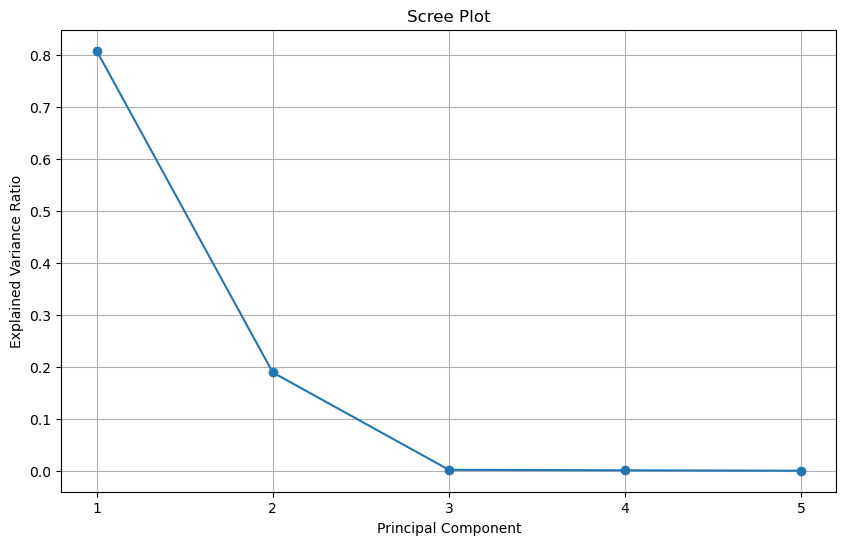

In [16]:
import matplotlib.pyplot as plt

# Plot the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, num_components + 1))
plt.grid(True)
plt.show()

Extracting the weights from the PCA model for all principal components.

In [17]:
# Extract the weights for all components
weights_all_components = pca.components_

# Print the weights for each component
for i, weights in enumerate(weights_all_components):
    print(f"Principal Component {i + 1} weights:")
    print(weights)
    print("\n")


Principal Component 1 weights:
[-0.49308233 -0.49629568 -0.495736   -0.49570563  0.13813819]


Principal Component 2 weights:
[0.11723272 0.01873323 0.07074418 0.06920482 0.98798356]


Principal Component 3 weights:
[ 0.52616727  0.47379729 -0.47982702 -0.51810189 -0.0007689 ]


Principal Component 4 weights:
[ 0.68172787 -0.72710157  0.04076742 -0.01023713 -0.06930829]


Principal Component 5 weights:
[-0.03900527  0.01338292  0.71926708 -0.69350721  0.00144949]




Extracting feature contributions.

In [18]:
features = df3.iloc[:, 1:-1]

# Feature Contribution Analysis
feature_contributions = pd.DataFrame(pca.components_, columns=features.columns)

# Print feature contributions
print("Feature Contributions:")
print(feature_contributions)

Feature Contributions:
       Open      High       Low     Close  Adj Close
0 -0.493082 -0.496296 -0.495736 -0.495706   0.138138
1  0.117233  0.018733  0.070744  0.069205   0.987984
2  0.526167  0.473797 -0.479827 -0.518102  -0.000769
3  0.681728 -0.727102  0.040767 -0.010237  -0.069308
4 -0.039005  0.013383  0.719267 -0.693507   0.001449


## Problem: 2

Profile Table of 'BMI.csv' dataset.

In [19]:
import pandas as pd
import numpy as np

# Specify data types for problematic columns (replace 'your_dataset.csv' and column names as needed)
column_data_types = {
    'ColumnName1': str,  # Replace 'ColumnName1' with the actual column name
    'ColumnName2': str,  # Replace 'ColumnName2' with the actual column name
    # Add more columns as needed
}

# Load your dataset into a Pandas DataFrame with specified data types and low_memory=False
df4 = pd.read_csv('./BMI.csv', dtype=column_data_types, low_memory=False)

# Get the total number of rows and columns
num_rows, num_cols = df4.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_cols}")
print("")
print("Profile Table:")

# Initialize an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column_name in df4.columns:
    column_data = df4[column_name]
    
    # Determine the data type
    data_type = str(column_data.dtype)
    
    # Calculate statistics based on data type
    if np.issubdtype(column_data, np.number):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_dev = column_data.std()
        unique_values = len(column_data.unique())  # Numeric columns don't have unique values
        top_3_values = column_data.value_counts().head(3).to_dict()  # Numeric columns don't have top values
    else:
        min_val = None  # Non-numeric columns don't have min values
        max_val = None  # Non-numeric columns don't have max values
        mean_val = None  # Non-numeric columns don't have mean values
        median_val = None  # Non-numeric columns don't have median values
        std_dev = None  # Non-numeric columns don't have standard deviation
        unique_values = len(column_data.unique())
        top_3_values = column_data.value_counts().head(3).to_dict()
    
    # Calculate missingness
    missingness_percentage = (column_data.isnull().sum() / num_rows) * 100
    
    # Add information to the profile data list
    profile_data.append([column_name, data_type, min_val, max_val, mean_val, median_val, std_dev, unique_values, top_3_values, missingness_percentage])

# Create a DataFrame from the profile data
profile_table = pd.DataFrame(profile_data, columns=['Column Name', 'Data Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

# Display the profile table
print(profile_table)

Total number of call instances/rows: 252
Total number of call features/columns: 14

Profile Table:
   Column Name Data Type    Min    Max        Mean  Median    Std Dev  \
0          Age     int64   22.0   81.0   44.884921   43.00  12.602040   
1       Weight   float64  116.0  366.1  181.497619  178.40  30.438150   
2       Height   float64   31.6   89.4   73.430159   73.40   5.989882   
3         Neck   float64   31.1   51.2   37.992063   38.00   2.430913   
4        Chest   float64   79.3  136.2  100.824206   99.65   8.430476   
5      Abdomen   float64   69.4  148.1   92.555952   90.95  10.783077   
6          Hip   float64   85.0  147.7   99.904762   99.30   7.164058   
7        Thigh   float64   47.2   87.3   59.405952   59.00   5.249952   
8         Knee   float64   33.0   49.1   38.590476   38.50   2.411805   
9        Ankle   float64   19.1   33.9   23.102381   22.80   1.694893   
10      Biceps   float64   24.8   45.0   32.273413   32.05   3.021274   
11     Forearm   float64 

a) Wrapper Method: Backward and Forward Stepwise Regression

In [20]:
import statsmodels.api as sm

# Drop the 'fatpctg' column to get the features
X = df4.drop(['fatpctg'], axis=1)
y = df4['fatpctg']

# Backward Stepwise Regression
def backward_selection(X, y):
    cols = list(X.columns)
    pmax = 1
    while len(cols) > 0:
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if pmax > 0.05:
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

selected_features_backward = backward_selection(X, df4['fatpctg'])
print("Selected Features (Backward Stepwise Regression):", selected_features_backward)

# Forward Stepwise Regression
def forward_selection(X, y, significance_level=0.05):
    remaining_features = set(X.columns)
    selected_features = []

    while remaining_features:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            p_value = model.pvalues[-1]  # Get the p-value of the added feature
            p_values.append((feature, p_value))

        # Select the feature with the lowest p-value
        selected_feature, min_p_value = min(p_values, key=lambda x: x[1])

        if min_p_value < significance_level:
            selected_features.append(selected_feature)
        else:
            break

        remaining_features.remove(selected_feature)

    return selected_features

selected_features_forward = forward_selection(X, df4['fatpctg'])
print("Selected Features (Forward Stepwise Regression):", selected_features_forward)


Selected Features (Backward Stepwise Regression): ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']
Selected Features (Forward Stepwise Regression): ['Abdomen', 'Weight', 'Wrist', 'Forearm']


b) Filter Method: Correlation Statistics

In [21]:
# b) Filter method: Correlation statistics
correlation_ranking = X.corrwith(y).abs().sort_values(ascending=False)
print("\nCorrelation Ranking:\n", correlation_ranking)


Correlation Ranking:
 Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


c) Embedded Method: Lasso Regression and Random Forest (Feature Importance Ranking)


Lasso Coefficients (Ranking):
 Wrist      1.671891
Abdomen    0.952544
Neck       0.529233
Forearm    0.434864
Hip        0.263354
Thigh      0.252302
Ankle      0.151898
Biceps     0.139816
Knee       0.092334
Age        0.067912
Height     0.052957
Weight     0.048828
Chest      0.047070
dtype: float64

Random Forest Feature Importance Ranking:
 Abdomen    0.714461
Weight     0.034879
Height     0.031647
Wrist      0.025763
Knee       0.025365
Chest      0.025277
Neck       0.023664
Age        0.023611
Hip        0.021523
Ankle      0.021000
Thigh      0.019079
Biceps     0.016923
Forearm    0.016809
dtype: float64


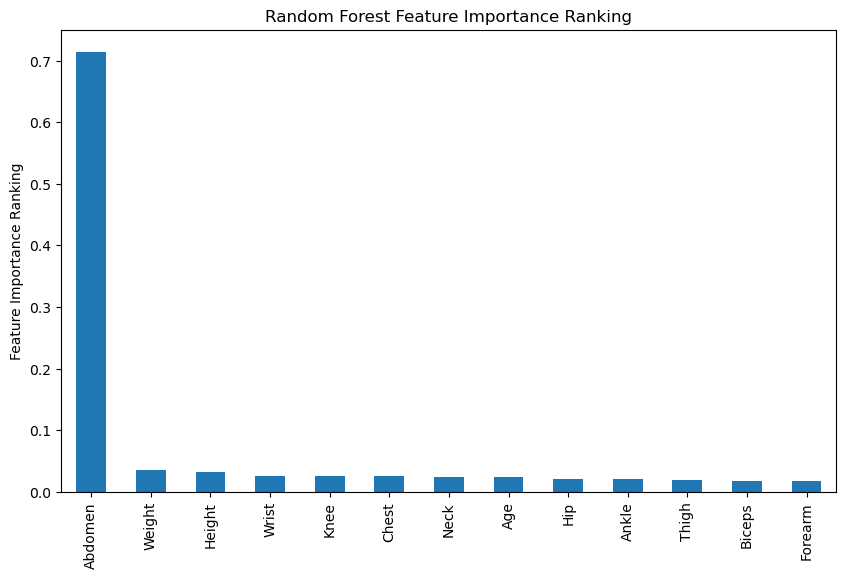

In [22]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# c) Embedded method: Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns).abs().sort_values(ascending=False)
print("\nLasso Coefficients (Ranking):\n", lasso_coefficients)

# c) Embedded method: Random Forest feature importance
rf = RandomForestRegressor()
rf.fit(X, y)
rf_feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance Ranking:\n", rf_feature_importance)

# Plotting Random Forest Feature Importance
plt.figure(figsize=(10, 6))
rf_feature_importance.plot(kind='bar')
plt.title('Random Forest Feature Importance Ranking')
plt.ylabel('Feature Importance Ranking')
plt.show()